In [76]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [77]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [78]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, MetaData
from dateutil.relativedelta import relativedelta
from sqlalchemy import create_engine, inspect
from datetime import datetime, timedelta

In [79]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [80]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [81]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [82]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [83]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [84]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [85]:
# Find the most recent date in the data set.

last_date = last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date 

'2017-08-23'

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

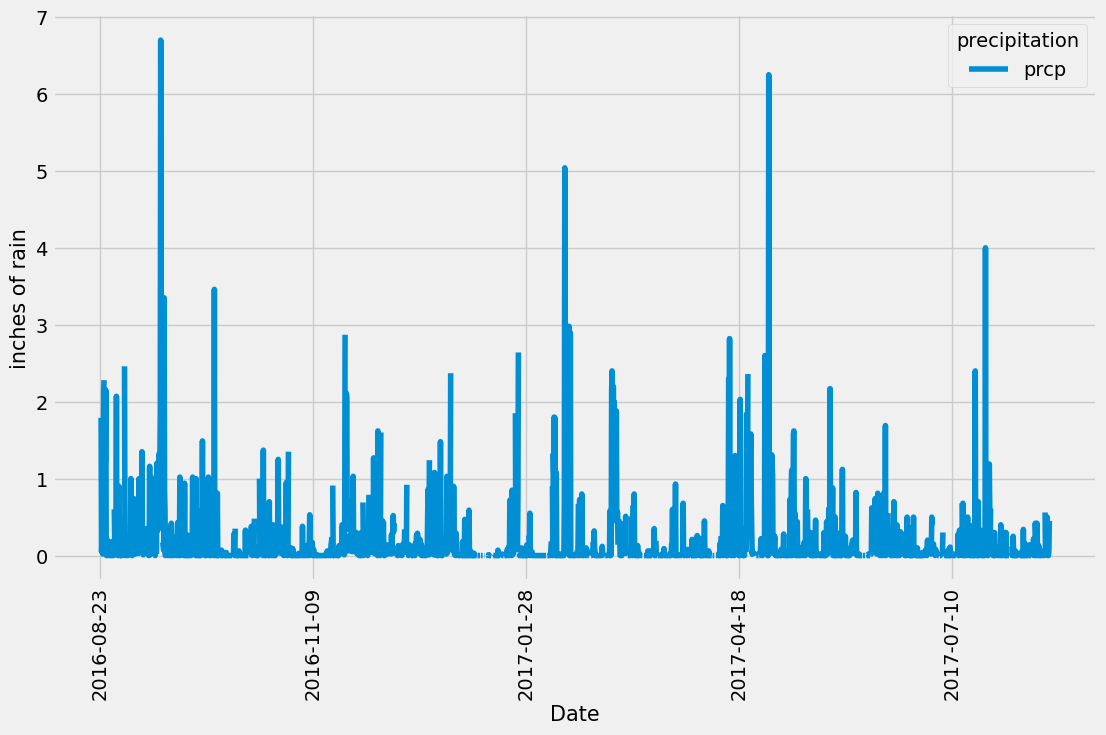

In [118]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = datetime.strptime(last_date, '%Y-%m-%d') - timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
past_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between(year_ago.strftime('%Y-%m-%d'), last_date)).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
climate_df = pd.DataFrame(past_year, columns=['date', 'prcp']).sort_values(by='date')

# Sort the dataframe by date
climate_df.set_index('date', inplace=True)
climate_df.head()



# Use Pandas Plotting with Matplotlib to plot the data
climate_df.plot(figsize=(12, 7)),
sort_columns=True,
rot=90,
use_index=True
plt.legend(title="precipitation")
plt.xlabel('Date', fontsize=15)
plt.ylabel('inches of rain', fontsize=15)
plt.xticks(rotation='vertical')

In [119]:
# Use Pandas to calculate the summary statistics for the precipitation data
climate_df[["prcp"]].describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [120]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(Station.name).count()
print(number_of_stations)

9


In [127]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [128]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

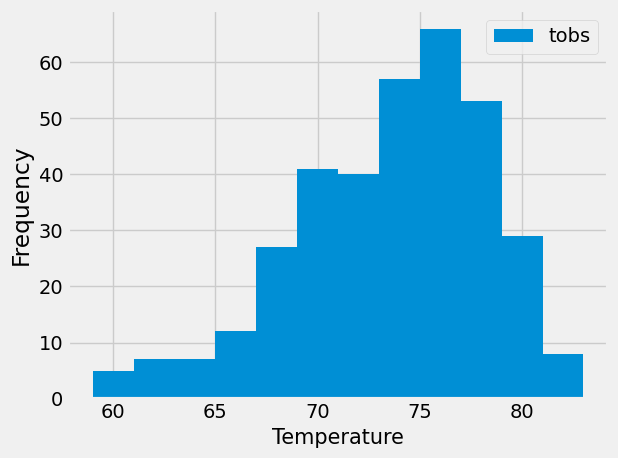

In [130]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.xlabel('Temperature', fontsize=15)
plt.tight_layout()

# Close Session

In [131]:
# Close Session
session.close()